<a href="https://colab.research.google.com/github/piyushnashani/GRIP-Intern-Tasks/blob/main/GRIP_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation - GRIP JUN'21**
# **Data Science and Business Analytics Intern**

> **Task 2: Classify the Iris Dataset into Clusters**

#### Done by: **Piyush Prakash Nashani**



**Step 1: Import the libraries**




In [207]:
import numpy as np                        ## used for working with arrays
import pandas as pd                       ## for data manipulation and analysis
import matplotlib.pyplot as plt           ## used for data visualization

**Step 2: Import the dataset**


In [244]:
from sklearn import datasets
data=pd.read_csv("https://raw.githubusercontent.com/piyushnashani/GRIP-Intern-Tasks/main/Iris.csv")
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()                               # Head function displays the data, by default shows 5 rows with columns containing feature

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [231]:
data            ##Actual Data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [232]:
## Distributing the data into x and y
x=data.iloc[:,1:5].values
y=data.iloc[:,5].values

**Step 3: Split the data into training and testing data**

In [234]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15)      ##15% testing data , function that splits the data automatically into training and testing data

**Step 4: Feature Scale the matrix of features using Standardization**

In [235]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)                                        ## Scaling the training data
xtest=sc.fit_transform(xtest)                                          ## Scaling the testing data 

**Step 5: Build a KNN Model**

In [236]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_neighbors=7)                                ## n_neighbours=(int)sqrt(len(data))/2    here sqrt(150)/2= nearly about 7   150=len(data)

**Step 6: Train the model on the dataset**

In [237]:
model.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


**Step 7: Get the predictions**

In [238]:
ypred=model.predict(xtest)
ytest

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [239]:
s1=pd.Series(ytest)
s2=pd.Series(ypred)
df=pd.DataFrame()
df["YTest"]=s1
df["YPred"]=s2
df.head()

,YTest,YPred
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-versicolor,Iris-versicolor
4,Iris-virginica,Iris-versicolor


**Confusion** **matrix**

In [240]:
from sklearn.metrics import  confusion_matrix
cm=confusion_matrix(ytest,ypred)
cm

array([[8, 0, 0],
       [0, 5, 0],
       [0, 2, 8]])

# ***Step 8: Accuracy***

In [241]:
from sklearn.metrics import accuracy_score
accu=accuracy_score(ytest,ypred)
accu          ## 91%

0.9130434782608695

**Visualization of Confusion Matrix**

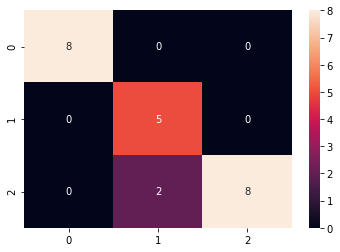

In [242]:
import seaborn as sns
sns.heatmap(cm, annot=True)

*Number of Correct Predictions= Sum of diagonal elements= 8+5+8 =21*

*number of Wrong Predictions = sum of rest of the elements = 2*

**Step 9: Using the Elbow method to find optimum number of clusters**

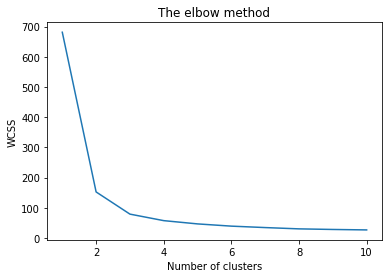

In [245]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**Step 10: Build the K-Means Clustering Model which uses the K-means++ algorithm to avoid Random Initialization Trap and Predict the cluster to which each entry belongs**

In [246]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

**Step 9: Visualize the clusters on a graph**

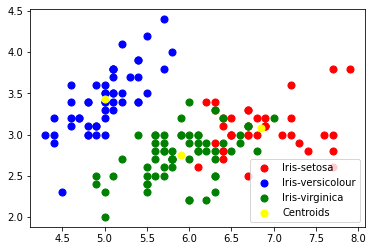

In [247]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()

In [ ]:
Thank you